### Bagaimana hubungan titik leleh dan energi ionisasi tiap unsur padatan dan pengelompokkannya menggunakan teknik K Means Clustering

#### Mengimport library yang diperlukan

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#### Melakukan import dataset lalu kemudian melihat banyaknya element/unsur berdasarkan Fase nya
#### Dataset dapat diperoleh dari tautan berikut https://gist.github.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee#file-periodic-table-of-elements-csv

In [2]:
df = pd.read_csv('./Periodic Table of Elements.csv')
df['Phase'].value_counts()

solid         77
artificial    28
gas           11
liq            2
Name: Phase, dtype: int64

In [3]:
df_solid = df[(df['Phase'] == 'solid')]
df_liquid = df[(df['Phase'] == 'liq')]
df_gas = df[(df['Phase'] == 'gas')]
df_artificial = df[(df['Phase'] == 'artificial')]

#### Membuat scatter plot untuk melihat hubungan antara Melting Point dan energi ionisasi pertama unsur fasa solid

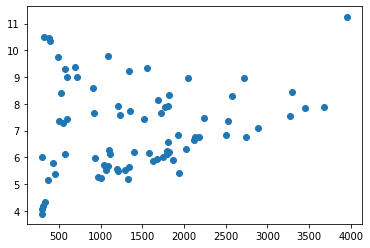

In [4]:
plt.scatter(df_solid['MeltingPoint'], df_solid['FirstIonization'])

Kita ingin melihat berapa banyak K yang perlu dipakai pada kondisi ini. Oleh karena itu kita pakai elbow theory lalu setelah itu mencari nilai SSE (Sum of Squared Errors)

In [5]:
range_k = range(1,10)
sse = [] # sse stands for Sum of Squared Errors
for k in range_k:
    km = KMeans(n_clusters = k)
    km.fit(df_solid[['MeltingPoint','FirstIonization']])
    sse.append(km.inertia_)

In [6]:
sse

[58606762.13714174,
 20251903.653216332,
 8302173.824751332,
 4265973.588493571,
 2174582.3854922904,
 1535363.7815194703,
 1159327.0593175085,
 890470.5700262387,
 616349.9648409951]

#### Plot nilai K terhadap SSE: 

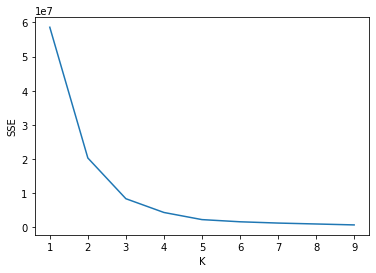

In [7]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(range_k,sse)

From the graph above whe can see that elbow bends in either K = 3 and K = 4. We can try both of them.

#### For the first we evaluate if the K is 4: 

In [8]:
km = KMeans(n_clusters = 4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
y_predicted = km.fit_predict(df_solid[['MeltingPoint','FirstIonization']])
y_predicted

array([0, 1, 1, 3, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0,
       0, 2, 2, 0, 0, 2, 1, 1, 3, 3, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 3, 3, 3, 1, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2])

In [12]:
df_solid['cluster'] = y_predicted
df_solid.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence,cluster
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,0.534,453.85,1615.0,5.0,Arfvedson,1817.0,3.582,2,1.0,0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,1.850,1560.15,2742.0,6.0,Vaulquelin,1798.0,1.825,2,2.0,1
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,2.340,2573.15,4200.0,6.0,Gay-Lussac,1808.0,1.026,2,3.0,1
5,6,Carbon,C,12.011,6,6,6,2,14.0,solid,...,2.270,3948.15,4300.0,7.0,Prehistoric,NaN,0.709,2,4.0,3
10,11,Sodium,Na,22.990,12,11,11,3,1.0,solid,...,0.971,371.15,1156.0,7.0,Davy,1807.0,1.228,3,1.0,0


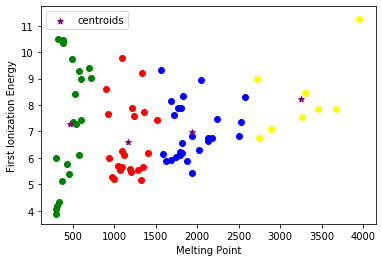

In [13]:
df1 = df_solid[df_solid.cluster == 0]
df2 = df_solid[df_solid.cluster == 1]
df3 = df_solid[df_solid.cluster == 2]
df4 = df_solid[df_solid.cluster == 3]

plt.scatter(df1['MeltingPoint'], df1['FirstIonization'], color = 'green')
plt.scatter(df2['MeltingPoint'], df2['FirstIonization'], color = 'blue')
plt.scatter(df3['MeltingPoint'], df3['FirstIonization'], color = 'red')
plt.scatter(df4['MeltingPoint'], df4['FirstIonization'], color = 'yellow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroids')

plt.xlabel('Melting Point')
plt.ylabel('First Ionization Energy')
plt.legend()

Dalam teori nya, Energi Ionisasi Pertama artinya besarnya energi yang diperlukan untuk melepas satu elektro valensi pada pada suatu atom/unsur. Elektron valensi sendiri merupakan elektron yang berada di kuliat terluar suatu atom. Untuk melihat hubungan yang lebih jauh kita memasukkan parameter Jari jari atom lalu kita plot ketiga variabel tersebut (Melting Point, Ionization Energy and Atomic Radius).

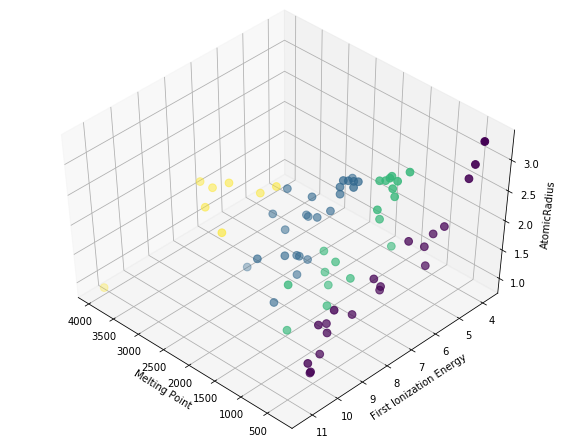

In [14]:
labels = df_solid['cluster']
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Melting Point')
ax.set_ylabel('First Ionization Energy')
ax.set_zlabel('AtomicRadius')

ax.scatter(df_solid['MeltingPoint'], df_solid['FirstIonization'], df_solid['AtomicRadius'], c= labels.astype(np.float), s = 60)

#### Kemudian kita melihat jika K = 3

In [15]:
km3 = KMeans(n_clusters = 3)
km3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
y3_predicted = km3.fit_predict(df_solid[['MeltingPoint','FirstIonization']])
y3_predicted

array([1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [22]:
df3_solid = df_solid.copy()
df3_solid['cluster'] = y3_predicted
df3_solid.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence,cluster
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,0.534,453.85,1615.0,5.0,Arfvedson,1817.0,3.582,2,1.0,1
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,1.850,1560.15,2742.0,6.0,Vaulquelin,1798.0,1.825,2,2.0,0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,2.340,2573.15,4200.0,6.0,Gay-Lussac,1808.0,1.026,2,3.0,2
5,6,Carbon,C,12.011,6,6,6,2,14.0,solid,...,2.270,3948.15,4300.0,7.0,Prehistoric,NaN,0.709,2,4.0,2
10,11,Sodium,Na,22.990,12,11,11,3,1.0,solid,...,0.971,371.15,1156.0,7.0,Davy,1807.0,1.228,3,1.0,1


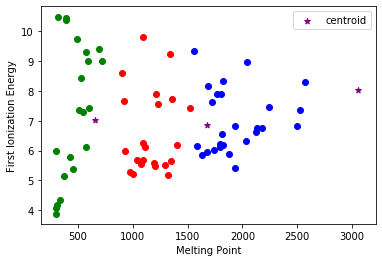

In [23]:
df1 = df3_solid[df_solid.cluster == 0]
df2 = df3_solid[df_solid.cluster == 1]
df3 = df3_solid[df_solid.cluster == 2]

plt.scatter(df1['MeltingPoint'], df1['FirstIonization'], color = 'green')
plt.scatter(df2['MeltingPoint'], df2['FirstIonization'], color = 'blue')
plt.scatter(df3['MeltingPoint'], df3['FirstIonization'], color = 'red')
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')


plt.xlabel('Melting Point')
plt.ylabel('First Ionization Energy')
plt.legend()

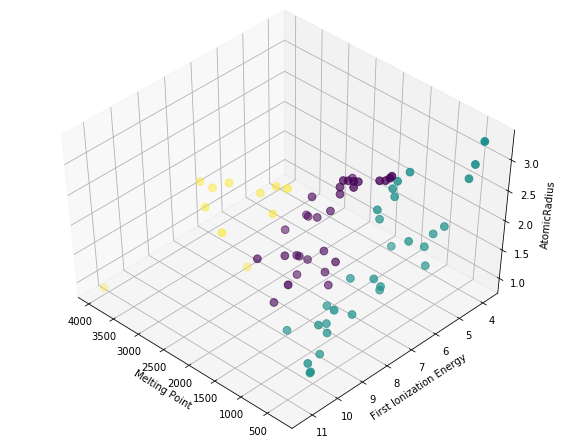

In [24]:
labels = df3_solid['cluster']
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Melting Point')
ax.set_ylabel('First Ionization Energy')
ax.set_zlabel('AtomicRadius')

ax.scatter(df3_solid['MeltingPoint'], df3_solid['FirstIonization'], df3_solid['AtomicRadius'], c= labels.astype(np.float), s = 60)